The data set we will be working with contains information on various cars.
For each car we have information :
    - the motor's displacement
    - weight of the car
    - miles per gallon
    -how fast the car accelerates
    - ...
    
    

In [1]:
import pandas as pd
import numpy as np 


In [2]:
#to solve the problem of matching column's names 
#with the dataset in the documentation: I added the param
#names with list of names to the read_csv function 
column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars  = pd.read_csv("imports-85.data",names=column_names )

In [3]:
cars.head(3)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [4]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

#from the last input and depending on the documentation we can see that the column taht are numeric are:['symboling','normalized_losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight','engine_size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [5]:
numeric_cars = cars[['symboling','normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight','engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']].copy()

In [6]:
numeric_cars.head(3)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500


### Data cleaning part 

replace all of the ? values with the numpy.nan missing value.

In [7]:
clean_losses = numeric_cars["normalized-losses"].replace('?', np.nan)

In [8]:
numeric_cars['normalized-losses']= clean_losses

In [9]:
numeric_cars.head(3)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500


In [10]:
#what if there is more '?' in other column, to be more general: 
numeric_cars = numeric_cars.replace('?', np.nan)

In [11]:
numeric_cars.dtypes

symboling              int64
normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [12]:
#we convert all column to float type with dataframe.astype()
numeric_cars = numeric_cars.astype('float')

let's check which column contain null values

In [13]:
numeric_cars.isnull().sum()

symboling             0
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

we can observe here that there are 6 column with null values: 
['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']

# normalized-losses have 41 rows with null values 

as the price is the value to predict in our case, so let's remove the 4 rows with null value 

In [14]:
numeric_cars = numeric_cars.dropna(subset=['price'])

In [15]:
numeric_cars.isnull().sum()

symboling             0
normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

now we replace all the null values in the other columns with the mean 


In [16]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [17]:
numeric_cars.isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

as we observe there is no more null values in the dataset.
now we gonna normalize all column on range from 0 to 1

In [18]:
save_price = numeric_cars["price"]

In [19]:
numeric_cars =  (numeric_cars - numeric_cars.min())/(numeric_cars.max()- numeric_cars.min())

In [20]:
numeric_cars["price"]= save_price

In [21]:
numeric_cars.head(3)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.125,0.495327,0.346939,0.166667,0.263158,16500.0


Let's start with some univariate k-nearest neighbors models.

In [22]:
numeric_cars.shape

(201, 16)

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [24]:
def knn_train_test(train_col, target_col, dt):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(dt.index)
    dt = dt.reindex(shuffled_index)

    #to split the data, we have to choose the size of the train data 
    #and the test data 
    #I would like to split it 60% 40% 
    train_indx = int (len(dt)*0.6)
    # randomize the data 
    #dt = dt.loc[np.random.permutation(len(dt))]
    train_dt = dt.iloc[0:train_indx]
    test_dt = dt.iloc[train_indx:]
    # Fit a KNN model using default k value.
    knn.fit(train_dt[[train_col]], train_dt[target_col])
    #calculate the prediction
    predictions = knn.predict(test_dt[[train_col]])
    #calculate and return the MSE 
    mse= mean_squared_error(predictions, test_dt[target_col])
    rmse = np.sqrt(mse)
    return(rmse)
    
    
    

In [25]:
rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          2970.410027
horsepower           4105.888870
city-mpg             4488.004214
width                4533.410631
curb-weight          4551.316194
highway-mpg          4651.759074
length               5130.627721
wheel-base           5199.657211
compression-rate     6746.649046
normalized-losses    6871.644233
peak-rpm             7116.500955
stroke               7209.340010
bore                 7254.245888
symboling            7803.279095
height               7852.391037
dtype: float64

# Modify the knn_train_test() function you wrote to accept a parameter for the k value

In [26]:
def knn_train_test_var_k(train_col, target_col, dt):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(dt.index)
    dt = dt.reindex(shuffled_index)

    #to split the data, we have to choose the size of the train data 
    #and the test data 
    #I would like to split it 60% 40% 
    train_indx = int (len(dt)*0.6)
    # randomize the data 
    #dt = dt.loc[np.random.permutation(len(dt))]
    train_dt = dt.iloc[0:train_indx]
    test_dt = dt.iloc[train_indx:]
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_dt[[train_col]], train_dt[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_dt[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_dt[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

In [27]:
k_rmse_results = {}

# For each column , train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test_var_k(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 6978.772635200775,
  3: 6883.931053672363,
  5: 7254.245887686214,
  7: 7006.137077218228,
  9: 6946.486774204024},
 'city-mpg': {1: 4314.139178544412,
  3: 4615.283478074819,
  5: 4488.0042142538705,
  7: 4546.854102013138,
  9: 4964.492950841448},
 'compression-rate': {1: 8482.959200074198,
  3: 7112.722193462341,
  5: 6746.649046456277,
  7: 6135.92727208237,
  9: 6586.98383058996},
 'curb-weight': {1: 5487.092711058661,
  3: 5428.5205976662455,
  5: 4551.316193892721,
  7: 4513.856227560189,
  9: 4419.43034682738},
 'engine-size': {1: 3237.1475917641133,
  3: 2848.398174259014,
  5: 2970.4100270651,
  7: 3347.2925033221513,
  9: 3516.9385416417367},
 'height': {1: 9935.40424907777,
  3: 8225.188493385102,
  5: 7852.391037098584,
  7: 7721.961578416698,
  9: 7874.3718414889345},
 'highway-mpg': {1: 6260.3071809616495,
  3: 5086.257230068613,
  5: 4651.759073620682,
  7: 4798.984778078251,
  9: 5136.95080975635},
 'horsepower': {1: 3274.3260959647937,
  3: 3927.557537436

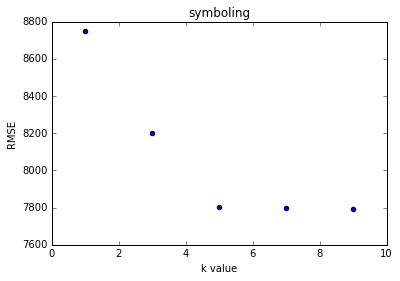

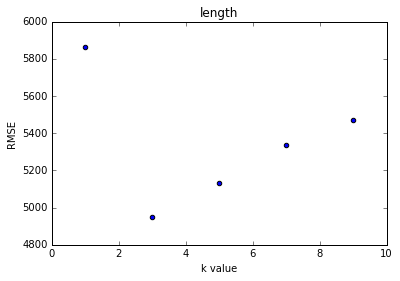

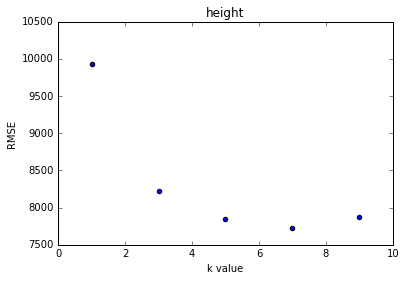

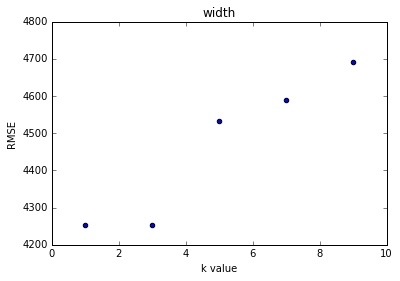

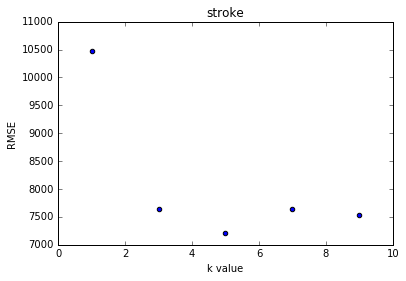

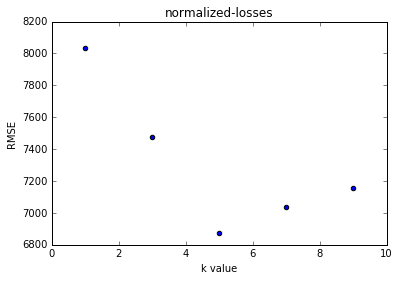

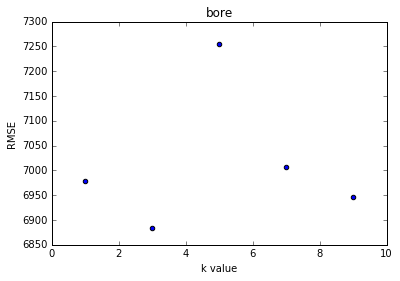

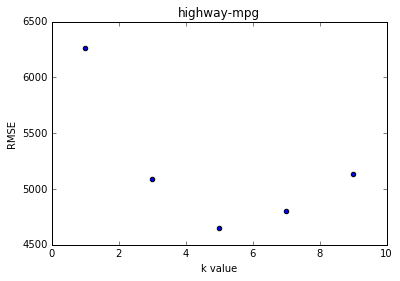

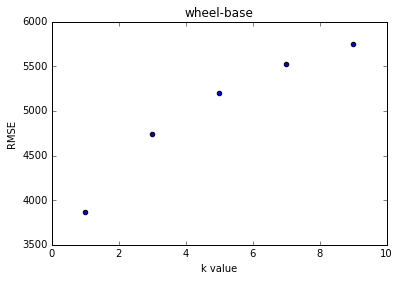

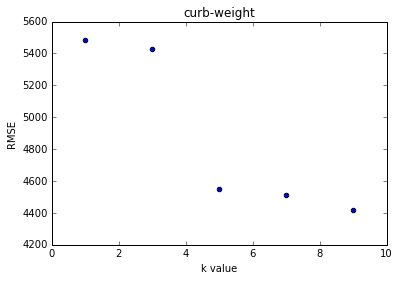

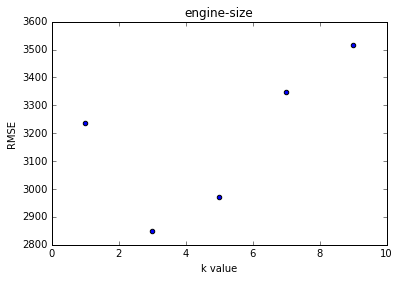

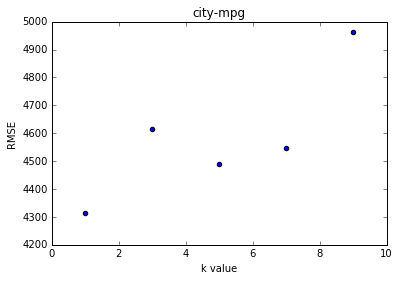

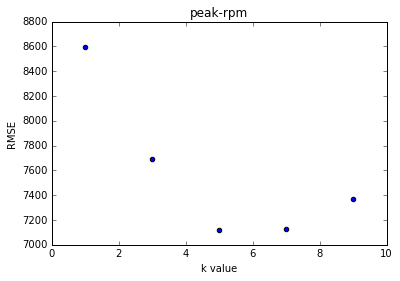

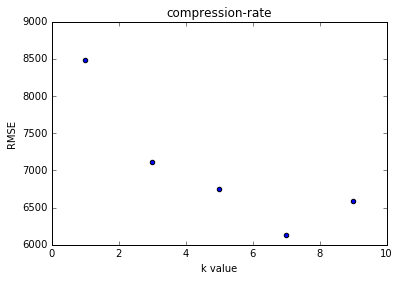

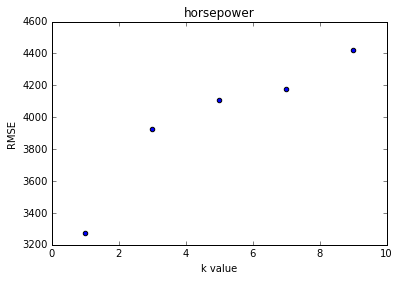

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
#let's visualize our results to interprate it 
for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.scatter(x, y)
    plt.title(k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.show()
    





In [29]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

engine-size          3184.037368
horsepower           3981.766682
width                4463.505864
city-mpg             4585.754785
curb-weight          4880.043215
wheel-base           5014.996914
highway-mpg          5186.851814
length               5349.318417
compression-rate     7013.048309
bore                 7013.914686
normalized-losses    7314.910528
peak-rpm             7580.414115
symboling            8069.030034
stroke               8100.679913
height               8321.863440
dtype: float64

In [30]:
def knn_train_test_list(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    train_indx = int (len(df)*0.6)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:train_indx]
    test_df = rand_df.iloc[train_indx:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

### we test knn_train_test_list() function we wrote in the last step to work with multiple columns combination.

In [31]:
k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test_list(two_best_features, 'price', numeric_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test_list(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test_list(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test_list(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
rmse_val = knn_train_test_list(six_best_features, 'price', numeric_cars)
k_rmse_results["six best features"] = rmse_val

k_rmse_results

{'five best features': {5: 3416.1325707209817},
 'four best features': {5: 3352.5102794513787},
 'six best features': {5: 3724.8994870522315},
 'three best features': {5: 3401.2830399028635},
 'two best features': {5: 3563.399984825146}}

we notice that the rmse is variable between 3352 {four best features} and 3724 {six best features}, the smallest values are:  'four best features': {5: 3352.5102794513787}
'three best features': {5: 3401.2830399028635}
'five best features': {5: 3416.1325707209817}

for these three case, we are going to vary  the hyperparameter value from 1 to 25 and plot the resulting RMSE values

In [32]:
def knn_train_test_list(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    train_indx = int (len(df)*0.6)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:train_indx]
    test_df = rand_df.iloc[train_indx:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

In [33]:
#three features
three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test_list(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

In [34]:
#four features
four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test_list(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

In [35]:
#five features
five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test_list(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

In [36]:
k_rmse_results

{'five best features': {1: 2366.903047663135,
  2: 2822.4390544437592,
  3: 3179.5781831080317,
  4: 3410.9562045219322,
  5: 3416.1325707209817,
  6: 3609.8910410411704,
  7: 3711.9478637312113,
  8: 3890.3530369024497,
  9: 4114.187585606607,
  10: 4241.0585520860495,
  11: 4376.933781498142,
  12: 4314.5162822632,
  13: 4401.729772477965,
  14: 4525.957999653317,
  15: 4547.018267905838,
  16: 4639.910071540298,
  17: 4652.587798291667,
  18: 4641.134348723924,
  19: 4719.786534030441,
  20: 4706.49881502517,
  21: 4718.976872695574,
  22: 4750.79331599609,
  23: 4792.094591840085,
  24: 4779.846794958319},
 'four best features': {1: 2358.69564289301,
  2: 2772.203868231382,
  3: 3130.2271204800386,
  4: 3333.7017765124438,
  5: 3352.5102794513787,
  6: 3529.4322531382377,
  7: 3680.967414050358,
  8: 3812.473667056398,
  9: 4060.1966372479983,
  10: 4200.386157997416,
  11: 4328.344680038482,
  12: 4316.974775526757,
  13: 4324.046749058281,
  14: 4431.868439931251,
  15: 4528.8739

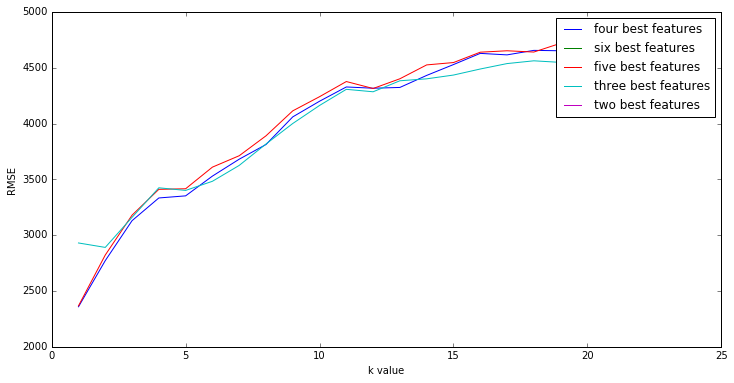

In [44]:
plt.figure(figsize= (12,6))
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y, label=k)
    
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend()



as much as we increase the k value, the rmse increase too, but we see that the smallest value for rmse obtained for a small number of k .
in this case, wich really accounts for the differences, is the selection of features and the selection of the train data itself.